# Linear regression code along

Dataser from ISLR - Introduction to Statistical learning


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


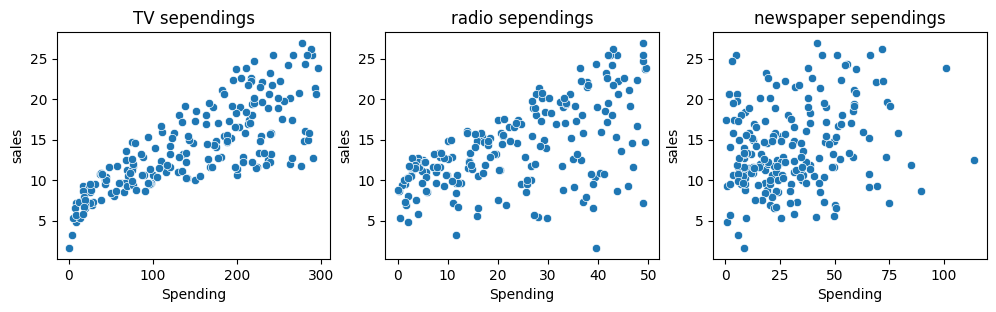

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(12,3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x = feature, y="sales", ax = ax[i])
    ax[i].set(xlabel = "Spending", title = f"{feature} sependings")

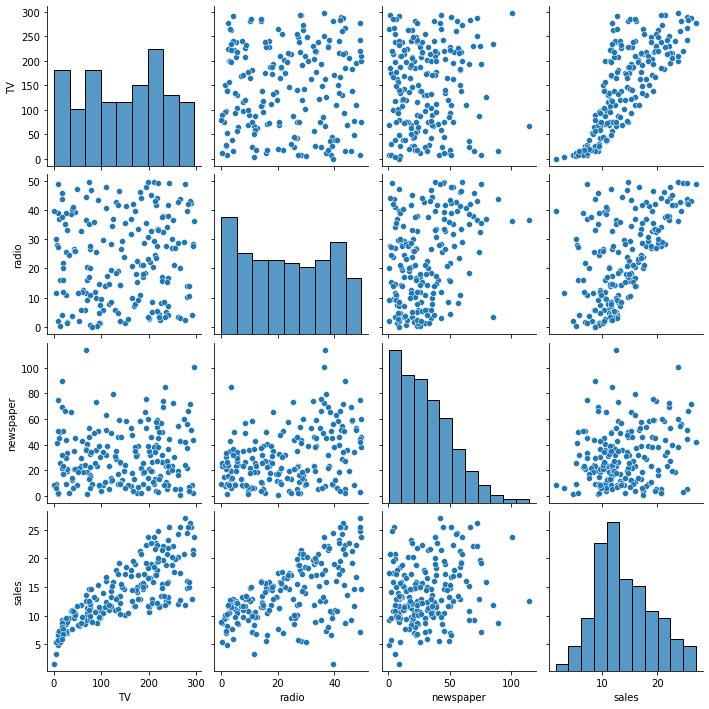

In [5]:
sns.pairplot(df)

## Simple linear regression

Intercept 7.033
Slope 0.048


ValueError: array length 50 does not match index length 200

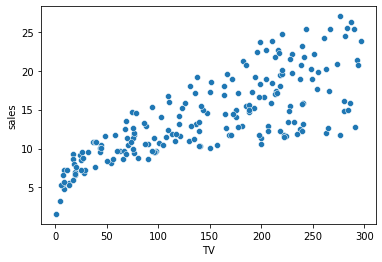

In [6]:
X, y = df["TV"], df["sales"]
beta_1, beta_0 = np.polyfit(X, y, deg = 1)
print(f"Intercept {beta_0:.3f}")
print(f"Slope {beta_1:.3f}")

def y_hat(x) : return beta_0 + beta_1*X

spend = np.linspace(0, 300)

sns.scatterplot(data=df, x= "TV", y = "sales")
sns.lineplot(x = spend, y= y_hat(spend), color="red")

In [ ]:
X, y = df.drop("sales", axis="columns"), df["sales"]
X.insert(0, "Intercept", 1)

# OLS normal equation/closed form equation
regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

beta_hat = regression_fit(X, y)
print(beta_hat)

predict = lambda x, beta: np.dot(x, beta)

# Typical data leakages
# Dont do in realaity, here we test for sanity

test_sample=[1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

print(f"Predicted value for this sample {y_hat:.2f}")
print(f"True value of this sample {y.iloc[0]}")

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64
Predicted value for this sample 20.52
True value of this sample 22.1


# Train|Test split

In [7]:
# splt 70 % training 30% test
train_fraction = int(len(df)*.7)
print(f"{train_fraction} samples for training data")
print(f"{len(df)-train_fraction} samples for test data")

train = df.sample(n=train_fraction, random_state=42, replace=False)
test = df.drop(train.index)

print(f"{train.index.isin(test.index).sum()} data from test in training")

X_train, y_train = train.drop("sales", axis=1), train["sales"]
X_test, y_test = test.drop("sales", axis=1), test["sales"]

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

140 samples for training data
60 samples for test data
0 data from test in training


# Prediction

In [ ]:
beta_hat = regression_fit(X_train, y_train)
predict = lambda X, weights: X @ weights

y_hat = predict(X_test.to_numpy(), beta_hat.to_numpy().reshape(4,1))
y_hat[:5], y_test[:5]

(array([[12.17324122],
        [12.19125728],
        [ 3.74653773],
        [ 8.90545078],
        [18.43980126]]),
 2     10.4
 8     13.2
 9      4.8
 14     9.7
 15    19.0
 Name: sales, dtype: float64)

## Evaluation

- MAE - Mean absolute error
- MSE - Mean square error (square of original unit, punishes autliers more than MAE, somewhat hard to interpert)
- RMSE - Root mean square error (OG unit )

In [ ]:
m = len(y_test)
y_hat = np.reshape(y_hat, m)

MAE = 1/m * np.sum(np.abs(y_test-y_hat))
MSE = 1/m*np.sum((y_test-y_hat)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(1.3244490959726523, 3.540425618238498, 1.8816018755939041)

In [ ]:
X_test.shape, beta_hat.shape

((60, 4), (4,))

In [ ]:
beta_hat.to_numpy().reshape(4,1)

array([[ 2.93888937e+00],
       [ 4.57646455e-02],
       [ 1.88530017e-01],
       [-1.03749304e-03]])